<center><u><H1>Linear Regression</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
%matplotlib inline

## Load data

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Analysing Data:

In [4]:
X = boston.data
y = boston.target

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
df['Price'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


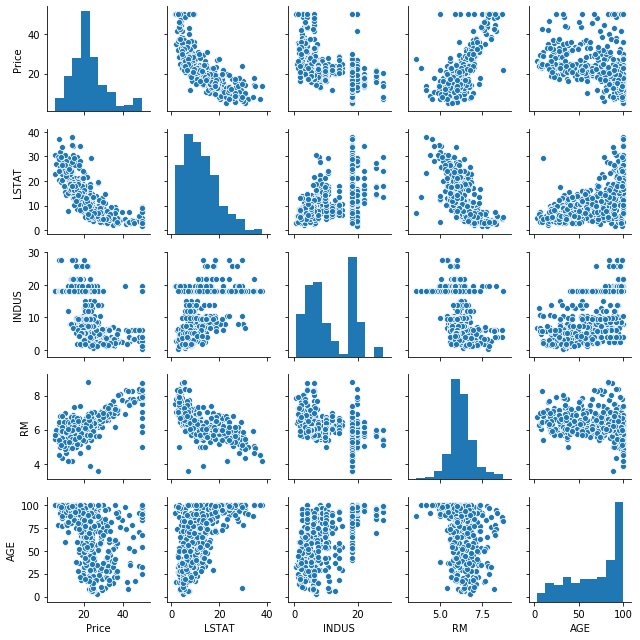

In [8]:
cols = ['Price', 'LSTAT', 'INDUS', 'RM', 'AGE']
sns.pairplot(df[cols], palette="coolwarm", height=1.8)
plt.tight_layout()

(5.0, 0.0)

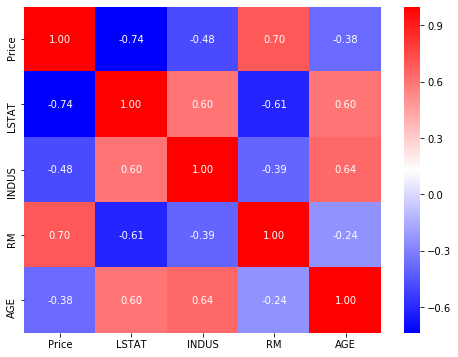

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap="bwr", yticklabels=cols, xticklabels=cols)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Creating a Linear regression model

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred = lr.predict(X)

Text(0.5, 1.0, 'Histogram for Predicted prices')

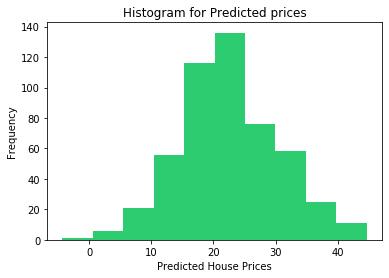

In [13]:
sns.set_palette(['#2ECC71'])
plt.hist(pred)
plt.xlabel('Predicted House Prices')
plt.ylabel('Frequency')
plt.title('Histogram for Predicted prices')

## Homoscedasticity and Normality:
- The error variance should be constant, which is known as homocesdasticity and the error should be normally distributed.

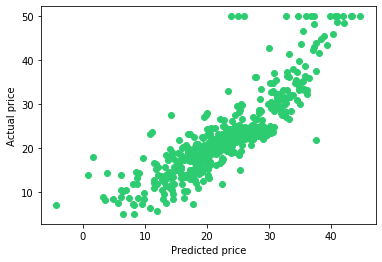

In [14]:
plt.scatter(pred, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

## Plotting residuals

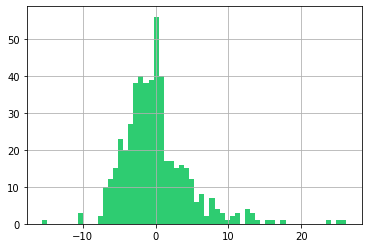

In [15]:
pd.Series(y-pred).hist(bins=60)

## Features and coefficients:

In [16]:
print(list(zip(boston.feature_names, lr.coef_)))

[('CRIM', -0.1080113578367946), ('ZN', 0.04642045836687875), ('INDUS', 0.020558626367081122), ('CHAS', 2.6867338193449415), ('NOX', -17.766611228300487), ('RM', 3.809865206809234), ('AGE', 0.0006922246403421586), ('DIS', -1.475566845600251), ('RAD', 0.3060494789851679), ('TAX', -0.012334593916574113), ('PTRATIO', -0.9527472317072904), ('B', 0.009311683273793898), ('LSTAT', -0.524758377855493)]


In [17]:
lr.intercept_

36.45948838509001

In [18]:
r2 = r2_score(y, pred)
print("R2 on test data: {:.2}".format(r2))

R2 on test data: 0.74


## Metrics: Cross Validation

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
pred_cv = cross_val_predict(lr, X, y, cv=10)

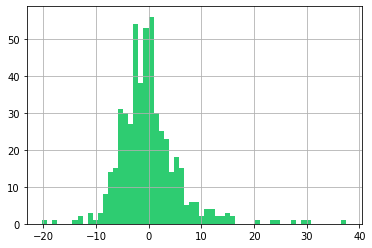

In [21]:
pd.Series(y-pred_cv).hist(bins=60)

## Metrics: MAE and MSE

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
print(f"Mean absolute error(MAE): {mean_absolute_error(y, pred_cv)}")

Mean absolute error(MAE): 3.997305852593253


In [26]:
print(f"Mean squared error(MSE): {mean_squared_error(y, pred_cv)}")

Mean squared error(MSE): 34.53965953999329


## Number of rooms vs House prices

In [27]:
X_ = df['RM'].values
y_ = df['Price'].values

In [28]:
X_.shape

(506,)

In [29]:
X_ = X_[:, np.newaxis]
y_ = y_[:, np.newaxis]

In [30]:
X_.shape

(506, 1)

In [32]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_std = sc_X.fit_transform(X_)
y_std = sc_y.fit_transform(y_)

## Plotting Linear Regression Model:

In [35]:
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(X_std, y_std)
pred2 = lr2.predict(X_std)

Text(0, 0.5, 'Actual House Prices in $1000s-stardardized')

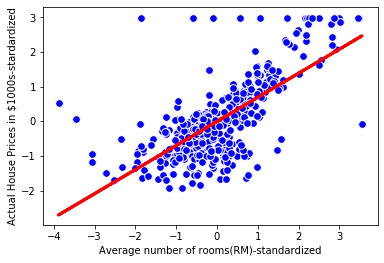

In [43]:
plt.scatter(X_std, y_std, c='blue', edgecolor='white', s=60)
plt.plot(X_std, pred2, color='red', lw=3)
plt.xlabel('Average number of rooms(RM)-standardized')
plt.ylabel('Actual House Prices in $1000s-stardardized')

In [37]:
print("Slope: %.3f " % lr2.coef_)

Slope: 0.695 


In [38]:
print("Intercept: %.3f" % lr2.intercept_)

Intercept: -0.000


In [ ]:
r2_ = r2_score(y_std, pred2)
print("R2 on test data: {:.2}".format(r2_))

## Predictions:

In [39]:
n_rooms = 9

In [40]:
n_rooms_std = sc_X.transform(np.reshape(n_rooms, (1, -1)))

In [41]:
price_std = lr2.predict(n_rooms_std)
price_std

array([[2.68997852]])

In [42]:
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 47.248


## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html